## Genealogies distances - node distances var and tree distances
### Identifying sources of conflict from varying Ne and gen with simulations on 8 tip tree

Simulation setup:
1. Vary Gentimes -> g = 1 -> Tc
2. Vary Ne -> g = 1 or 10 -> same Tc
3. Variable Ne and gen -> same Tc

In [44]:
from platform import python_version
print(python_version())

3.8.5


In [1]:
import toytree
import toyplot
import numpy as np
import pandas as pd
import ipyrad
import itertools
import ipcoal
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={"figure.figsize":(5, 5)})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['font.size'] = 15

## (A) Species tree gen & Ne

### Initial tree topology

In [3]:
tre = toytree.rtree.imbtree(8).mod.edges_scale_to_root_height(5e6)
tre.draw(tree_style = "c", layout = "d");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t1cd63110dcc34e33bc65f3d30d608d2b"> r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

### Vary Ne (Ne = 1e7 or 1e8, g=1)

In [4]:
# start with 8 tip tree
tre1 = toytree.rtree.imbtree(8).mod.edges_scale_to_root_height(5e6)
tre1.draw(tree_style="p");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t109b84ea70344557a2132782920f63e5"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

In [5]:
tre1.get_node_data()

,idx,name,height,dist,support
0,0,r0,0.000000e+00,7.142857e+05,NaN
1,1,r1,0.000000e+00,7.142857e+05,NaN
2,2,r2,0.000000e+00,1.428571e+06,NaN
3,3,r3,0.000000e+00,2.142857e+06,NaN
4,4,r4,0.000000e+00,2.857143e+06,NaN
5,5,r5,0.000000e+00,3.571429e+06,NaN
6,6,r6,0.000000e+00,4.285714e+06,NaN
7,7,r7,0.000000e+00,5.000000e+06,NaN
8,8,,7.142857e+05,7.142857e+05,NaN
9,9,,1.428571e+06,7.142857e+05,NaN


In [6]:
b = {i:1e8 for i in [12, 11, 10, 3, 4, 5]}
b

{12: 100000000.0,
 11: 100000000.0,
 10: 100000000.0,
 3: 100000000.0,
 4: 100000000.0,
 5: 100000000.0}

In [8]:
tre1 = tre1.set_node_data(
    feature = "Ne", 
    data = b,
    default = 1e7
)

tre1 = tre1.set_node_data(
    feature = "g", 
    default = 1
)
tre1.get_node_data()

,idx,name,height,dist,support,Ne,g
0,0,r0,0.000000e+00,7.142857e+05,NaN,10000000.0,1
1,1,r1,0.000000e+00,7.142857e+05,NaN,10000000.0,1
2,2,r2,0.000000e+00,1.428571e+06,NaN,10000000.0,1
3,3,r3,0.000000e+00,2.142857e+06,NaN,100000000.0,1
4,4,r4,0.000000e+00,2.857143e+06,NaN,100000000.0,1
5,5,r5,0.000000e+00,3.571429e+06,NaN,100000000.0,1
6,6,r6,0.000000e+00,4.285714e+06,NaN,10000000.0,1
7,7,r7,0.000000e+00,5.000000e+06,NaN,10000000.0,1
8,8,,7.142857e+05,7.142857e+05,NaN,10000000.0,1
9,9,,1.428571e+06,7.142857e+05,NaN,10000000.0,1


In [9]:
tre1 = tre1.set_node_data(
    feature = "Ne", 
    data = b,
    default = 1e7
)

tre1 = tre1.set_node_data(
    feature = "g", 
    default = 1
)
tre1.get_node_data()

,idx,name,height,dist,support,Ne,g
0,0,r0,0.000000e+00,7.142857e+05,NaN,10000000.0,1
1,1,r1,0.000000e+00,7.142857e+05,NaN,10000000.0,1
2,2,r2,0.000000e+00,1.428571e+06,NaN,10000000.0,1
3,3,r3,0.000000e+00,2.142857e+06,NaN,100000000.0,1
4,4,r4,0.000000e+00,2.857143e+06,NaN,100000000.0,1
5,5,r5,0.000000e+00,3.571429e+06,NaN,100000000.0,1
6,6,r6,0.000000e+00,4.285714e+06,NaN,10000000.0,1
7,7,r7,0.000000e+00,5.000000e+06,NaN,10000000.0,1
8,8,,7.142857e+05,7.142857e+05,NaN,10000000.0,1
9,9,,1.428571e+06,7.142857e+05,NaN,10000000.0,1


In [10]:
tre1.draw(
    width=300, 
    height=250,
    tree_style="p",
    node_labels=False,
    node_sizes=6
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t46fa7ad8250242e69873c60f68d6b110"> r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

### Vary gentimes (g = 1 or 10, Ne = 1e7)

In [11]:
# start with 8 tip tree
tre2 = toytree.rtree.imbtree(8).mod.edges_scale_to_root_height(5e6)
tre2.draw(tree_style="p");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te1b6a98cdfdc485c9c635414abd928ee"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

In [12]:
tre2.get_node_data()

,idx,name,height,dist,support
0,0,r0,0.000000e+00,7.142857e+05,NaN
1,1,r1,0.000000e+00,7.142857e+05,NaN
2,2,r2,0.000000e+00,1.428571e+06,NaN
3,3,r3,0.000000e+00,2.142857e+06,NaN
4,4,r4,0.000000e+00,2.857143e+06,NaN
5,5,r5,0.000000e+00,3.571429e+06,NaN
6,6,r6,0.000000e+00,4.285714e+06,NaN
7,7,r7,0.000000e+00,5.000000e+06,NaN
8,8,,7.142857e+05,7.142857e+05,NaN
9,9,,1.428571e+06,7.142857e+05,NaN


In [13]:
# set r2, r3, r4 as shorter branches with g = 10, others default as g = 1
a = {i:10 for i in [12, 11, 10, 3, 4, 5]}
#a = {i:10 for i in [0, 1, 5, 6, 7, 8, 9, 13, 14]}
a

{12: 10, 11: 10, 10: 10, 3: 10, 4: 10, 5: 10}

In [14]:
tre2 = tre2.set_node_data(
    feature="g", 
    data = a, 
    default = 1)

tre2 = tre2.set_node_data(
    feature = "dist", 
    data = {i: i.dist / i.g for i in tre2.get_feature_dict()}
)

tre2 = tre2.set_node_data(
    feature = "Ne", 
    default = 1e7
)

tre2.get_node_data()

,idx,name,height,dist,support,Ne,g
0,0,r0,1.928571e+06,7.142857e+05,NaN,10000000.0,1
1,1,r1,1.928571e+06,7.142857e+05,NaN,10000000.0,1
2,2,r2,1.928571e+06,1.428571e+06,NaN,10000000.0,1
3,3,r3,3.857143e+06,2.142857e+05,NaN,10000000.0,10
4,4,r4,3.857143e+06,2.857143e+05,NaN,10000000.0,10
5,5,r5,3.857143e+06,3.571429e+05,NaN,10000000.0,10
6,6,r6,0.000000e+00,4.285714e+06,NaN,10000000.0,1
7,7,r7,0.000000e+00,5.000000e+06,NaN,10000000.0,1
8,8,,2.642857e+06,7.142857e+05,NaN,10000000.0,1
9,9,,3.357143e+06,7.142857e+05,NaN,10000000.0,1


In [15]:
# draw gentime scaled tree
tre2.draw(
    tree_style='c',
    tip_labels_align=True,
    width=300, 
    height=250
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tc3cb108f50814518b4c16ccc58d5c393"> r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

### Vary Ne and gentimes (Ne = 1e7 or 1e6, g = 1 or 10)

In [16]:
# start with 8 tip tree
tre3 = toytree.rtree.imbtree(8).mod.edges_scale_to_root_height(5e6)
tre3.draw(tree_style="p");

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tac1238ecb20147b682b68b14f5a2af57"> 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

In [17]:
tre3.get_node_data()

,idx,name,height,dist,support
0,0,r0,0.000000e+00,7.142857e+05,NaN
1,1,r1,0.000000e+00,7.142857e+05,NaN
2,2,r2,0.000000e+00,1.428571e+06,NaN
3,3,r3,0.000000e+00,2.142857e+06,NaN
4,4,r4,0.000000e+00,2.857143e+06,NaN
5,5,r5,0.000000e+00,3.571429e+06,NaN
6,6,r6,0.000000e+00,4.285714e+06,NaN
7,7,r7,0.000000e+00,5.000000e+06,NaN
8,8,,7.142857e+05,7.142857e+05,NaN
9,9,,1.428571e+06,7.142857e+05,NaN


In [18]:
c = {i:10 for i in [10, 11, 12, 2, 3, 4]}
# 0, 1, 5, 6, 7, 8, 9, 13, 14
d = {i:1e6 for i in [10, 11, 12, 2, 3, 4]}
c

{10: 10, 11: 10, 12: 10, 2: 10, 3: 10, 4: 10}

In [19]:
d

{10: 1000000.0,
 11: 1000000.0,
 12: 1000000.0,
 2: 1000000.0,
 3: 1000000.0,
 4: 1000000.0}

In [21]:
tre3 = tre3.set_node_data(
    feature = "g", 
    data = c,
    default = 1
)

tre3 = tre3.set_node_data(
    feature = "dist", 
    data = {i: i.dist / i.g for i in tre3.get_feature_dict()}
)

tre3 = tre3.set_node_data(
    feature = "Ne", 
    data = d,
    default = 1e7
)

tre3.get_node_data()

,idx,name,height,dist,support,Ne,g
0,0,r0,1.928571e+06,7.142857e+05,NaN,10000000.0,1
1,1,r1,1.928571e+06,7.142857e+05,NaN,10000000.0,1
2,2,r2,3.214286e+06,1.428571e+05,NaN,1000000.0,10
3,3,r3,3.857143e+06,2.142857e+05,NaN,1000000.0,10
4,4,r4,3.857143e+06,2.857143e+05,NaN,1000000.0,10
5,5,r5,6.428571e+05,3.571429e+06,NaN,10000000.0,1
6,6,r6,0.000000e+00,4.285714e+06,NaN,10000000.0,1
7,7,r7,0.000000e+00,5.000000e+06,NaN,10000000.0,1
8,8,,2.642857e+06,7.142857e+05,NaN,10000000.0,1
9,9,,3.357143e+06,7.142857e+05,NaN,10000000.0,1


In [22]:
tre3.draw(
    width=300, 
    height=250,
    tree_style="p",
    node_labels=False,
    node_sizes=6,
    tip_labels_align=True,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t72ad428b769a404493320e4b3e1f8cb5"> r0 r1 r2 r3 r4 r5 r6 r7 0 1000000 2000000 3000000 4000000 5000000

## (B) coal. units (Tc)

In [24]:
# vary Ne
tre1_Tc = tre

tre1_Tc = tre1_Tc.set_node_data(
    feature = "Ne", 
    data = b,
    default = 1e7
)

tre1_Tc = tre1_Tc.set_node_data(
    feature = "g", 
    default = 1
)

tre1_Tc = tre1_Tc.set_node_data(
   feature = "tg", 
   data = {i: (5e6 / i.g) for i in tre1_Tc.get_feature_dict()})

tre1_Tc = tre1_Tc.set_node_data(
   feature = "tc", 
   data = {i: (i.tg / (2 * i.Ne)) for i in tre1_Tc.get_feature_dict()})

tre1_Tc = tre1_Tc.set_node_data(
    feature = "dist", 
    data = {i: i.dist * i.tc for i in tre1_Tc.get_feature_dict()})
    
tre1_Tc.get_node_data()

,idx,name,height,dist,support,Ne,g,tc,tg
0,0,r0,4.821429e+05,1.785714e+05,NaN,10000000.0,1,0.250,5000000.0
1,1,r1,4.821429e+05,1.785714e+05,NaN,10000000.0,1,0.250,5000000.0
2,2,r2,4.821429e+05,3.571429e+05,NaN,10000000.0,1,0.250,5000000.0
3,3,r3,9.642857e+05,5.357143e+04,NaN,100000000.0,1,0.025,5000000.0
4,4,r4,9.642857e+05,7.142857e+04,NaN,100000000.0,1,0.025,5000000.0
5,5,r5,9.642857e+05,8.928571e+04,NaN,100000000.0,1,0.025,5000000.0
6,6,r6,0.000000e+00,1.071429e+06,NaN,10000000.0,1,0.250,5000000.0
7,7,r7,0.000000e+00,1.250000e+06,NaN,10000000.0,1,0.250,5000000.0
8,8,,6.607143e+05,1.785714e+05,NaN,10000000.0,1,0.250,5000000.0
9,9,,8.392857e+05,1.785714e+05,NaN,10000000.0,1,0.250,5000000.0


In [25]:
tre1_Tc.draw(
    width=300, 
    height=250,
    tree_style="c",
    tip_labels_align=True,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3fa0aa37484c450794564ea9abe27ca7"> r0 r1 r2 r3 r4 r5 r6 r7 0 400000 800000 1200000

In [26]:
# vary gen
tre2_Tc = tre

tre2_Tc = tre2_Tc.set_node_data(
    feature="g", 
    data = a, 
    default = 1)

tre2_Tc = tre2_Tc.set_node_data(
    feature = "Ne", 
    default = 1e8
)

tre2_Tc = tre2_Tc.set_node_data(
   feature = "tg", 
   data = {i: (5e6 / i.g) for i in tre2_Tc.get_feature_dict()})

tre2_Tc = tre2_Tc.set_node_data(
   feature = "tc", 
   data = {i: (i.tg / (2 * i.Ne)) for i in tre2_Tc.get_feature_dict()})

tre2_Tc = tre2_Tc.set_node_data(
    feature = "dist", 
    data = {i: i.dist * i.tc for i in tre2_Tc.get_feature_dict()})
    
tre2_Tc.get_node_data()

,idx,name,height,dist,support,Ne,g,tc,tg
0,0,r0,48214.285714,17857.142857,NaN,100000000.0,1,0.0250,5000000.0
1,1,r1,48214.285714,17857.142857,NaN,100000000.0,1,0.0250,5000000.0
2,2,r2,48214.285714,35714.285714,NaN,100000000.0,1,0.0250,5000000.0
3,3,r3,96428.571429,5357.142857,NaN,100000000.0,10,0.0025,500000.0
4,4,r4,96428.571429,7142.857143,NaN,100000000.0,10,0.0025,500000.0
5,5,r5,96428.571429,8928.571429,NaN,100000000.0,10,0.0025,500000.0
6,6,r6,0.000000,107142.857143,NaN,100000000.0,1,0.0250,5000000.0
7,7,r7,0.000000,125000.000000,NaN,100000000.0,1,0.0250,5000000.0
8,8,,66071.428571,17857.142857,NaN,100000000.0,1,0.0250,5000000.0
9,9,,83928.571429,17857.142857,NaN,100000000.0,1,0.0250,5000000.0


In [27]:
tre2_Tc.draw(
    width=300, 
    height=250,
    tree_style="c",
    tip_labels_align=True,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tfddbb86fefd34a43982fed131d149378"> r0 r1 r2 r3 r4 r5 r6 r7 0 40000 80000 120000

In [28]:
# vary Ne & gen
tre3_Tc = tre

tre3_Tc = tre3_Tc.set_node_data(
    feature = "g", 
    data = c,
    default = 1
)

tre3_Tc = tre3_Tc.set_node_data(
    feature = "Ne", 
    data = d,
    default = 1e7
)

tre3_Tc = tre3_Tc.set_node_data(
   feature = "tg", 
   data = {i: (5e6 / i.g) for i in tre3_Tc.get_feature_dict()})

tre3_Tc = tre3_Tc.set_node_data(
   feature = "tc", 
   data = {i: (i.tg / (2 * i.Ne)) for i in tre3_Tc.get_feature_dict()})

tre3_Tc = tre3_Tc.set_node_data(
    feature = "dist", 
    data = {i: i.dist * i.tc for i in tre3_Tc.get_feature_dict()})
    
tre3_Tc.get_node_data()

,idx,name,height,dist,support,Ne,g,tc,tg
0,0,r0,0.000000e+00,1.785714e+05,NaN,10000000.0,1,0.25,5000000.0
1,1,r1,0.000000e+00,1.785714e+05,NaN,10000000.0,1,0.25,5000000.0
2,2,r2,2.328306e-10,3.571429e+05,NaN,1000000.0,10,0.25,500000.0
3,3,r3,0.000000e+00,5.357143e+05,NaN,1000000.0,10,0.25,500000.0
4,4,r4,0.000000e+00,7.142857e+05,NaN,1000000.0,10,0.25,500000.0
5,5,r5,2.328306e-10,8.928571e+05,NaN,10000000.0,1,0.25,5000000.0
6,6,r6,0.000000e+00,1.071429e+06,NaN,10000000.0,1,0.25,5000000.0
7,7,r7,0.000000e+00,1.250000e+06,NaN,10000000.0,1,0.25,5000000.0
8,8,,1.785714e+05,1.785714e+05,NaN,10000000.0,1,0.25,5000000.0
9,9,,3.571429e+05,1.785714e+05,NaN,10000000.0,1,0.25,5000000.0


In [29]:
tre3_Tc.draw(
    width=300, 
    height=250,
    tree_style="c",
    tip_labels_align=True,
);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="250.0px" viewBox="0 0 300.0 250.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t6cf0ad7134284dd6a0bdfa29e4253d99"> r0 r1 r2 r3 r4 r5 r6 r7 0 400000 800000 1200000

## (C-E) Variance in node distances among genealogies

### Node distance DEMO

In [26]:
table = toytree.distance.get_node_distance_matrix(tre1, topology_only=True)
table.iloc[:tre1.ntips, :tre1.ntips]

,0,1,2,3,4,5,6,7
0,0,3,4,5,6,7,8,8
1,3,0,3,4,5,6,7,7
2,4,3,0,3,4,5,6,6
3,5,4,3,0,3,4,5,5
4,6,5,4,3,0,3,4,4
5,7,6,5,4,3,0,3,3
6,8,7,6,5,4,3,0,2
7,8,7,6,5,4,3,2,0


## (C) Unlinked

## Vary Ne

### Simulate

In [31]:
vary_Ne = ipcoal.Model(tree=tre1)
vary_Ne.sim_trees(nloci=100, nsites=1) 
vary_Ne.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,1,1,0,0,(r1:25432049.95355219021...
1,1,0,1,1,0,0,(r7:16854389.64786350354...
2,2,0,1,1,0,0,(r2:31692763.18858621269...
3,3,0,1,1,0,0,((r3:12092698.9228019639...
4,4,0,1,1,0,0,((r4:7711214.16152146458...
...,...,...,...,...,...,...,...
95,95,0,1,1,0,0,((r1:6639245.55700238514...
96,96,0,1,1,0,0,((r1:6137731.41738273296...
97,97,0,1,1,0,0,(r4:26417259.68053110688...
98,98,0,1,1,0,0,(r6:40752884.36545343697...


In [32]:
vary_Ne.df.to_csv('./vary_Ne_df_100_toy3update.csv')

### Node distance Var

In [33]:
vary_Ne_nodedist_matrixes = []

In [39]:
vary_Ne.df["genealogy"][1]

'(r7:16854389.64786350354552,(r3:13803154.82563056051731,((r2:4752372.18104184884578,r5:4752372.18104184884578):7680530.44047247432172,((r1:4819416.07021754793823,r6:4819416.07021754793823):2133804.14146045688540,(r0:5079444.98440339788795,r4:5079444.98440339788795):1873775.22727460693568):5479682.40983631927520):1370252.20411623641849):3051234.82223294302821);'

In [42]:
toytree.tree("((a,b),c);")

TypeError: unsupported operand type(s) for |: 'dict' and 'dict'

In [34]:
for i in range(0, vary_Ne.df.shape[0]):
    tree = toytree.tree(vary_Ne.df["genealogy"][i])
    table = toytree.distance.get_node_distance_matrix(tree, topology_only=True)
    table_final = table.iloc[:tree.ntips, :tree.ntips]
    vary_Ne_nodedist_matrixes.append(table_final)

TypeError: unsupported operand type(s) for |: 'dict' and 'dict'

In [181]:
vary_Ne_concat = pd.concat((vary_Ne_nodedist_matrixes), axis=1)
vary_Ne_var = vary_Ne_concat.stack().groupby(level=[0,1]).var().unstack()
vary_Ne_var

,0,1,2,3,4,5,6,7
0,0.000,2.912,4.145,4.889,5.344,5.509,6.020,6.020
1,2.912,0.000,3.233,4.617,5.408,5.777,6.360,6.360
2,4.145,3.233,0.000,3.384,4.873,5.574,6.259,6.259
3,4.889,4.617,3.384,0.000,3.489,4.884,5.817,5.817
4,5.344,5.408,4.873,3.489,0.000,3.395,4.962,4.962
5,5.509,5.777,5.574,4.884,3.395,0.000,3.567,3.567
6,6.020,6.360,6.259,5.817,4.962,3.567,0.000,2.000
7,6.020,6.360,6.259,5.817,4.962,3.567,2.000,0.000


In [182]:
vary_Ne_var.to_csv('./vary_Ne_var_100_toy3update.csv')

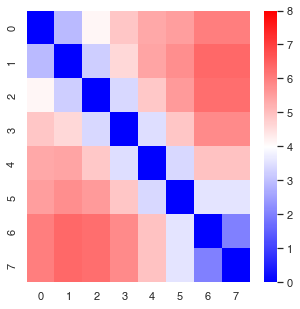

In [183]:
sns.heatmap(vary_Ne_var, cmap="bwr", vmin=0, vmax=8);

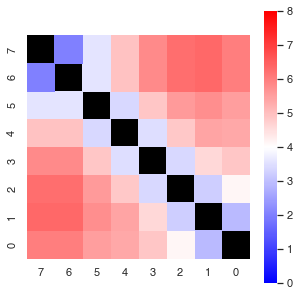

In [184]:
# styling
ax = sns.heatmap(vary_Ne_avg, cmap="bwr", vmin=0, vmax=8, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), square=True)
ax.set_facecolor('black')
plt.ylim(0,8)
plt.xlim(8,0)
plt.show()

### Node distance variance

In [185]:
vary_Ne_var = vary_Ne_concat.stack().groupby(level=[0,1]).var().unstack()
vary_Ne_var.to_csv('./vary_Ne_var.csv')
vary_Ne_var

,0,1,2,3,4,5,6,7
0,0.000000,0.612869,0.560536,0.517196,0.656320,0.680600,0.786386,0.786386
1,0.612869,0.000000,1.155867,1.007318,0.812348,0.685957,0.765165,0.765165
2,0.560536,1.155867,0.000000,1.804348,1.518389,1.007532,1.133052,1.133052
3,0.517196,1.007318,1.804348,0.000000,2.218097,1.554098,1.416928,1.416928
4,0.656320,0.812348,1.518389,2.218097,0.000000,1.992968,1.433990,1.433990
5,0.680600,0.685957,1.007532,1.554098,1.992968,0.000000,1.024536,1.024536
6,0.786386,0.765165,1.133052,1.416928,1.433990,1.024536,0.000000,0.000000
7,0.786386,0.765165,1.133052,1.416928,1.433990,1.024536,0.000000,0.000000


In [186]:
# make mask for cross-diagonal of matrix
blank_matrix = np.diag([1, 1, 1, 1, 1, 1, 1, 1])
blank_matrix

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

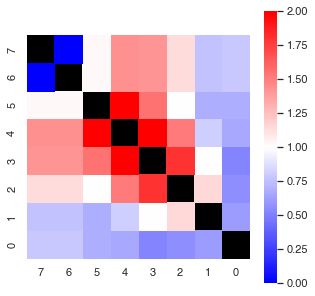

In [187]:
# styling
ax = sns.heatmap(vary_Ne_var, cmap="bwr", vmin=0, vmax=2, square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]))
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

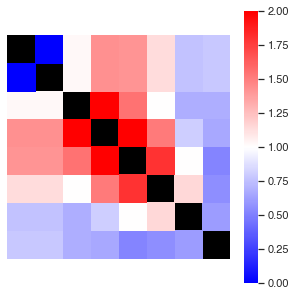

In [188]:
# styling
ax = sns.heatmap(vary_Ne_var, cmap="bwr", vmin=0, vmax=2, square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## Vary gen

### Simulate

In [189]:
vary_gen = ipcoal.Model(tree=tre2)
vary_gen.sim_trees(nloci=100, nsites=1) 

In [190]:
vary_gen.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,1,1,0,0,(r0:48809538.02542513608...
1,1,0,1,1,0,0,(r4:32065745.25919305533...
2,2,0,1,1,0,0,(((r3:1771089.6739540891...
3,3,0,1,1,0,0,(r6:36609947.78720645606...
4,4,0,1,1,0,0,((r4:3432302.31264203786...
...,...,...,...,...,...,...,...
995,995,0,1,1,0,0,((r1:8223345.00700323563...
996,996,0,1,1,0,0,(r2:30417554.79784663766...
997,997,0,1,1,0,0,(((r2:1563731.6087629590...
998,998,0,1,1,0,0,(r3:54308548.03249641507...


In [191]:
vary_gen.df.to_csv('./vary_gen_df.csv')

### Node distance Avg

In [192]:
vary_gen_nodedist_matrixes = []

In [193]:
for i in range(0, vary_gen.df.shape[0]):
    tree = toytree.tree(vary_gen.df["genealogy"][i])
    table = toytree.distance.get_node_distance_matrix(tree, topology_only=True)
    table_final = table.iloc[:tree.ntips, :tree.ntips]
    vary_gen_nodedist_matrixes.append(table_final)

In [194]:
vary_gen_concat = pd.concat((vary_gen_nodedist_matrixes), axis=1)
vary_gen_avg = vary_gen_concat.stack().groupby(level=[0,1]).mean().unstack()
vary_gen_avg

,0,1,2,3,4,5,6,7
0,0.000,2.926,4.130,4.850,5.321,5.515,6.039,6.039
1,2.926,0.000,3.204,4.596,5.413,5.801,6.381,6.381
2,4.130,3.204,0.000,3.392,4.901,5.597,6.283,6.283
3,4.850,4.596,3.392,0.000,3.509,4.879,5.817,5.817
4,5.321,5.413,4.901,3.509,0.000,3.370,4.930,4.930
5,5.515,5.801,5.597,4.879,3.370,0.000,3.560,3.560
6,6.039,6.381,6.283,5.817,4.930,3.560,0.000,2.000
7,6.039,6.381,6.283,5.817,4.930,3.560,2.000,0.000


In [195]:
vary_gen_avg.to_csv('./vary_gen_avg.csv')

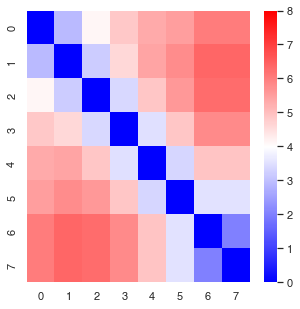

In [196]:
sns.heatmap(vary_gen_avg, cmap="bwr", vmin=0, vmax=8);

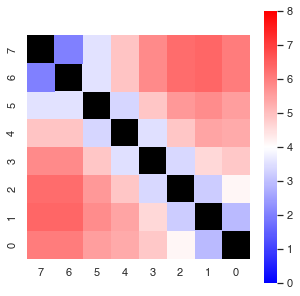

In [197]:
# styling
ax = sns.heatmap(vary_gen_avg, cmap="bwr", vmin=0, vmax=8, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), square=True)
ax.set_facecolor('black')
plt.ylim(0,8)
plt.xlim(8,0)
plt.show()

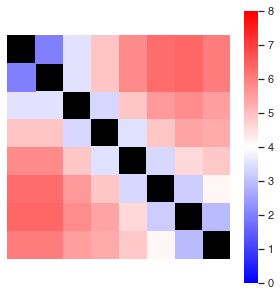

In [198]:
# styling
ax = sns.heatmap(vary_gen_avg, cmap="bwr", vmin=0, vmax=8, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False, square=True)
ax.set_facecolor('black')
plt.ylim(0,8)
plt.xlim(8,0)
plt.show()

### Node distance variance

In [199]:
vary_gen_var = vary_gen_concat.stack().groupby(level=[0,1]).var().unstack()
vary_gen_var.to_csv('./vary_gen_var.csv')
vary_gen_var

,0,1,2,3,4,5,6,7
0,0.000000,0.635159,0.547648,0.526026,0.662622,0.672447,0.794273,0.794273
1,0.635159,0.000000,1.143528,1.001786,0.783214,0.676075,0.790630,0.790630
2,0.547648,1.143528,0.000000,1.790126,1.486686,1.031623,1.128039,1.128039
3,0.526026,1.001786,1.790126,0.000000,2.222141,1.571931,1.440952,1.440952
4,0.662622,0.783214,1.486686,2.222141,0.000000,1.874975,1.332432,1.332432
5,0.672447,0.676075,1.031623,1.571931,1.874975,0.000000,0.993393,0.993393
6,0.794273,0.790630,1.128039,1.440952,1.332432,0.993393,0.000000,0.000000
7,0.794273,0.790630,1.128039,1.440952,1.332432,0.993393,0.000000,0.000000


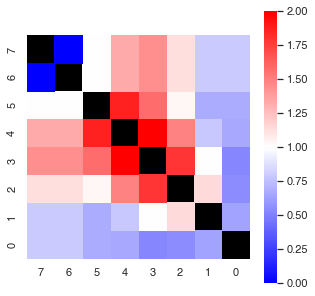

In [200]:
# styling
ax = sns.heatmap(vary_gen_var, cmap="bwr", vmin=0, vmax=2, square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]))
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

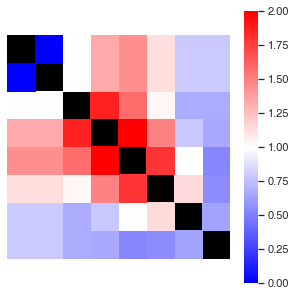

In [202]:
# styling
ax = sns.heatmap(vary_gen_var, cmap="bwr", vmin=0, vmax=2, square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## Vary Ne and gen

### Simulate

In [203]:
# variable Ne and gen
vary_Ne_gen = ipcoal.Model(tree=tre3)
vary_Ne_gen.sim_trees(nloci=100, nsites=1) 

In [204]:
vary_Ne_gen.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,1,1,0,0,(r1:25228820.30043955892...
1,1,0,1,1,0,0,((r6:4646768.66944618150...
2,2,0,1,1,0,0,((r1:10750808.7335090134...
3,3,0,1,1,0,0,((r6:5827263.35284039005...
4,4,0,1,1,0,0,(r1:53786827.12837311625...
...,...,...,...,...,...,...,...
995,995,0,1,1,0,0,((r0:5324757.76672075781...
996,996,0,1,1,0,0,((r1:7925081.55950413830...
997,997,0,1,1,0,0,((r0:6013975.08798147924...
998,998,0,1,1,0,0,((r1:14987908.8343260344...


In [205]:
vary_Ne_gen.df.to_csv('./vary_Ne_gen_df.csv')

### Node distance Avg

In [206]:
vary_Ne_gen_nodedist_matrixes = []

In [207]:
for i in range(0, vary_Ne_gen.df.shape[0]):
    tree = toytree.tree(vary_Ne_gen.df["genealogy"][i])
    table = toytree.distance.get_node_distance_matrix(tree, topology_only=True)
    table_final = table.iloc[:tree.ntips, :tree.ntips]
    vary_Ne_gen_nodedist_matrixes.append(table_final)

In [208]:
vary_Ne_gen_concat = pd.concat((vary_Ne_gen_nodedist_matrixes), axis=1)
vary_Ne_gen_avg = vary_Ne_gen_concat.stack().groupby(level=[0,1]).mean().unstack()
vary_Ne_gen_avg

,0,1,2,3,4,5,6,7
0,0.000,2.935,4.109,4.888,5.346,5.554,6.067,6.067
1,2.935,0.000,3.174,4.633,5.425,5.809,6.392,6.392
2,4.109,3.174,0.000,3.459,4.883,5.569,6.276,6.276
3,4.888,4.633,3.459,0.000,3.424,4.794,5.765,5.765
4,5.346,5.425,4.883,3.424,0.000,3.370,4.941,4.941
5,5.554,5.809,5.569,4.794,3.370,0.000,3.571,3.571
6,6.067,6.392,6.276,5.765,4.941,3.571,0.000,2.000
7,6.067,6.392,6.276,5.765,4.941,3.571,2.000,0.000


In [209]:
vary_Ne_gen_avg.to_csv('./vary_Ne_gen_avg.csv')

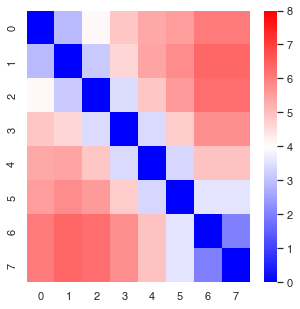

In [210]:
sns.heatmap(vary_Ne_gen_avg, cmap="bwr", vmin=0, vmax=8);

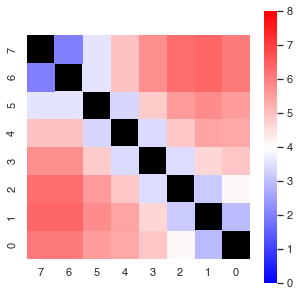

In [211]:
# styling
ax = sns.heatmap(vary_Ne_gen_avg, cmap="bwr", vmin=0, vmax=8, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), square=True)
ax.set_facecolor('black')
plt.ylim(0,8)
plt.xlim(8,0)
plt.show()

### Node distance variance

In [212]:
vary_Ne_gen_var = vary_Ne_gen_concat.stack().groupby(level=[0,1]).var().unstack()
vary_Ne_gen_var.to_csv('./vary_Ne_gen_var.csv')
vary_Ne_gen_var

,0,1,2,3,4,5,6,7
0,0.000000,0.607382,0.567687,0.529986,0.682967,0.701786,0.847358,0.847358
1,0.607382,0.000000,1.110835,1.003314,0.807182,0.719238,0.841177,0.841177
2,0.567687,1.110835,0.000000,1.800119,1.502814,1.076315,1.150975,1.150975
3,0.529986,1.003314,1.800119,0.000000,2.090314,1.525089,1.403178,1.403178
4,0.682967,0.807182,1.502814,2.090314,0.000000,1.794895,1.308828,1.308828
5,0.701786,0.719238,1.076315,1.525089,1.794895,0.000000,1.080039,1.080039
6,0.847358,0.841177,1.150975,1.403178,1.308828,1.080039,0.000000,0.000000
7,0.847358,0.841177,1.150975,1.403178,1.308828,1.080039,0.000000,0.000000


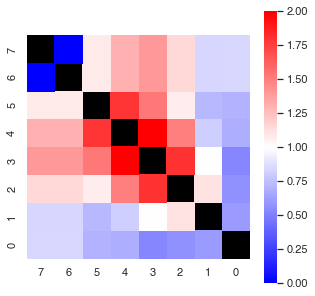

In [213]:
# styling
ax = sns.heatmap(vary_Ne_gen_var, cmap="bwr", vmin=0, vmax=2, square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]))
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

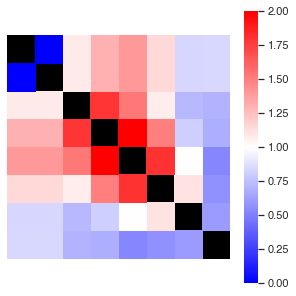

In [214]:
# styling
ax = sns.heatmap(vary_Ne_gen_var, cmap="bwr", vmin=0, vmax=2, square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## (D) Linked

## Vary Ne

### Simulate

In [89]:
vary_Ne_linked_1000 = ipcoal.Model(tree=tre1)
vary_Ne_linked_1000.sim_trees(nloci=100, nsites=1000) 

In [90]:
vary_Ne_linked_10000 = ipcoal.Model(tree=tre1)
vary_Ne_linked_10000.sim_trees(nloci=100, nsites=10000) 

In [24]:
vary_Ne_linked_1000.df.to_csv('./vary_Ne_linked_1000_df_100loci.csv')
vary_Ne_linked_10000.df.to_csv('./vary_Ne_linked_10000_df_100loci.csv')

### Difference of Node distance Var

In [398]:
# 1000
vary_Ne_linked_1000_mats = []

for loc, item in vary_Ne_linked_1000.df.groupby("locus"):
    nwk0 = item.loc[item.tidx == 0, "genealogy"].item()
    nwk1 = item.iloc[-1, -1]
    t0 = toytree.tree(nwk0)
    t1 = toytree.tree(nwk1)
    d0 = toytree.distance.get_tip_distance_matrix(t0)
    d1 = toytree.distance.get_tip_distance_matrix(t1)
    diff = abs(d0 - d1)
    vary_Ne_linked_1000_mats.append(diff)

vary_Ne_linked_1000_m = np.array(vary_Ne_linked_1000_mats).var(axis=0) 
pd.DataFrame(vary_Ne_linked_1000_m)

,0,1,2,3,4,5,6,7
0,0.000000e+00,2.100770e+15,1.716963e+15,1.626346e+15,1.507430e+15,1.344304e+15,1.271402e+15,1.317972e+15
1,2.100770e+15,0.000000e+00,1.029075e+15,1.525210e+15,1.468482e+15,1.299378e+15,1.134149e+15,1.108010e+15
2,1.716963e+15,1.029075e+15,0.000000e+00,1.467385e+15,1.578517e+15,1.406243e+15,1.300071e+15,1.288759e+15
3,1.626346e+15,1.525210e+15,1.467385e+15,0.000000e+00,9.720345e+14,1.083821e+15,1.091535e+15,1.160791e+15
4,1.507430e+15,1.468482e+15,1.578517e+15,9.720345e+14,0.000000e+00,8.808426e+14,8.955314e+14,9.634425e+14
5,1.344304e+15,1.299378e+15,1.406243e+15,1.083821e+15,8.808426e+14,0.000000e+00,5.937754e+14,6.951434e+14
6,1.271402e+15,1.134149e+15,1.300071e+15,1.091535e+15,8.955314e+14,5.937754e+14,0.000000e+00,3.197506e+14
7,1.317972e+15,1.108010e+15,1.288759e+15,1.160791e+15,9.634425e+14,6.951434e+14,3.197506e+14,0.000000e+00


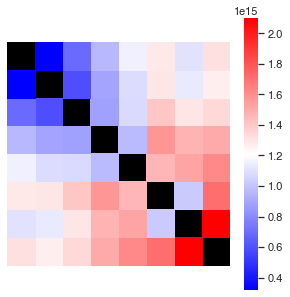

In [447]:
# styling
ax = sns.heatmap(vary_Ne_linked_1000_m, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

In [397]:
# 10000
vary_Ne_linked_10000_mats = []

for loc, item in vary_Ne_linked_10000.df.groupby("locus"):
    nwk0 = item.loc[item.tidx == 0, "genealogy"].item()
    nwk1 = item.iloc[-1, -1]
    t0 = toytree.tree(nwk0)
    t1 = toytree.tree(nwk1)
    d0 = toytree.distance.get_tip_distance_matrix(t0)
    d1 = toytree.distance.get_tip_distance_matrix(t1)
    diff = abs(d0 - d1)
    vary_Ne_linked_10000_mats.append(diff)

vary_Ne_linked_10000_m = np.array(vary_Ne_linked_10000_mats).var(axis=0) 
pd.DataFrame(vary_Ne_linked_10000_m)

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.029817e+15,1.388234e+15,1.924750e+15,1.926370e+15,1.743805e+15,1.640109e+15,1.608445e+15
1,1.029817e+15,0.000000e+00,1.080693e+15,1.851935e+15,1.911249e+15,2.179428e+15,2.070511e+15,2.012516e+15
2,1.388234e+15,1.080693e+15,0.000000e+00,1.994356e+15,2.127086e+15,2.461279e+15,2.347590e+15,2.289634e+15
3,1.924750e+15,1.851935e+15,1.994356e+15,0.000000e+00,8.351893e+14,1.368533e+15,1.329309e+15,1.259259e+15
4,1.926370e+15,1.911249e+15,2.127086e+15,8.351893e+14,0.000000e+00,1.094095e+15,1.117340e+15,1.056942e+15
5,1.743805e+15,2.179428e+15,2.461279e+15,1.368533e+15,1.094095e+15,0.000000e+00,3.474911e+14,5.381060e+14
6,1.640109e+15,2.070511e+15,2.347590e+15,1.329309e+15,1.117340e+15,3.474911e+14,0.000000e+00,3.337186e+14
7,1.608445e+15,2.012516e+15,2.289634e+15,1.259259e+15,1.056942e+15,5.381060e+14,3.337186e+14,0.000000e+00


In [395]:
toyplot.matrix(vary_Ne_linked_10000_m)

(<toyplot.canvas.Canvas at 0x7fa165f6fac0>,
 <toyplot.coordinates.Table at 0x7fa165f6f340>)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="600px" height="600px" viewBox="0 0 600 600" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t2345280f1a294e0cbd246b2527074739"> 0 1 2 3 4 5 6 7 0 0.000000 1029816556566351.875000 1388234284726603.000000 1924749601039663.000000 1926369895657308.750000 1743805001766631.750000 1640109087528910.000000 1608445294603458.000000 1 1029816556566351.875000 0.000000 1080693062181476.750000 1851935394606059.500000 1911249264399531.250000 2179427995941640.750000 2070510535751213.000000 2012516331423530.250000 2 1388234284726603.000000 1080693062181476.750000 0.000000 1994356237735327.250000 2127086032755778.500000 2461278832969580.000000 2347590295443130.000000 2289633607998648.500000 3 1924749601039663.000000 1851935394606059.500000 1994356237735327.250000 0.000000 835189341537993.000000 1368532822393814.500000 1329308602199533.250000 1259258794564898.750000 4 1926369895657308.750000 1911249264399531.250000 2127086032755778.500000 835189341537993.000000 0.000000 1094094797401931.375000 1117339990418249.750000 1056941948806598.375000 5 1743805001766631.750000 2179427995941640.750000 2461278832969580.000000 1368532822393814.500000 1094094797401931.375000 0.000000 347491145888837.750000 538105992793427.062500 6 1640109087528910.000000 2070510535751213.000000 2347590295443130.000000 1329308602199533.250000 1117339990418249.750000 347491145888837.750000 0.000000 333718610958952.000000 7 1608445294603458.000000 2012516331423530.250000 2289633607998648.500000 1259258794564898.750000 1056941948806598.375000 538105992793427.062500 333718610958952.000000 0.000000

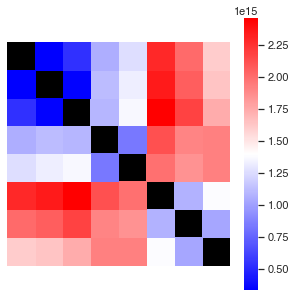

In [396]:
# styling
ax = sns.heatmap(vary_Ne_linked_10000_m, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## Vary gen

### Simulate

In [95]:
# variable Ne
vary_gen_linked_1000 = ipcoal.Model(tree=tre2)
vary_gen_linked_1000.sim_trees(nloci=100, nsites=1000) 

In [96]:
vary_gen_linked_10000 = ipcoal.Model(tree=tre2)
vary_gen_linked_10000.sim_trees(nloci=100, nsites=10000) 

In [137]:
vary_gen_linked_10000.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,31,31,0,0,((r7:7483346.25314146094...
1,0,31,50,19,0,1,((r7:7483346.25314146094...
2,0,50,54,4,0,2,((r7:7483346.25314146094...
3,0,54,77,23,0,3,((r7:7483346.25314146094...
4,0,77,91,14,0,4,((r7:7483346.25314146094...
...,...,...,...,...,...,...,...
90076,99,9965,9968,3,0,871,((r0:8045905.21620666421...
90077,99,9968,9986,18,0,872,((r0:8045905.21620666421...
90078,99,9986,9989,3,0,873,(r5:30883132.73125101998...
90079,99,9989,9997,8,0,874,(((r1:7830562.3286050502...


In [98]:
vary_gen_linked_1000.df.to_csv('./vary_gen_linked_1000_df_100loci.csv')
vary_gen_linked_10000.df.to_csv('./vary_gen_linked_10000_df_100loci.csv')

### Difference of Node distance Var

In [401]:
# 1000
vary_gen_linked_1000_mats = []

for loc, item in vary_gen_linked_1000.df.groupby("locus"):
    nwk0 = item.loc[item.tidx == 0, "genealogy"].item()
    nwk1 = item.iloc[-1, -1]
    t0 = toytree.tree(nwk0)
    t1 = toytree.tree(nwk1)
    d0 = toytree.distance.get_tip_distance_matrix(t0)
    d1 = toytree.distance.get_tip_distance_matrix(t1)
    diff = abs(d0 - d1)
    vary_gen_linked_1000_mats.append(diff)

vary_gen_linked_1000_m = np.array(vary_gen_linked_1000_mats).var(axis=0) 
pd.DataFrame(vary_gen_linked_1000_m)

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.102663e+15,1.339100e+15,1.522060e+15,1.349571e+15,1.392608e+15,1.389472e+15,1.363078e+15
1,1.102663e+15,0.000000e+00,1.154249e+15,1.457796e+15,1.462097e+15,1.535338e+15,1.516654e+15,1.509163e+15
2,1.339100e+15,1.154249e+15,0.000000e+00,1.435408e+15,1.482301e+15,1.528764e+15,1.519266e+15,1.530268e+15
3,1.522060e+15,1.457796e+15,1.435408e+15,0.000000e+00,9.352709e+14,1.036551e+15,9.435619e+14,9.927228e+14
4,1.349571e+15,1.462097e+15,1.482301e+15,9.352709e+14,0.000000e+00,6.498376e+14,7.974701e+14,8.770502e+14
5,1.392608e+15,1.535338e+15,1.528764e+15,1.036551e+15,6.498376e+14,0.000000e+00,6.356747e+14,7.454723e+14
6,1.389472e+15,1.516654e+15,1.519266e+15,9.435619e+14,7.974701e+14,6.356747e+14,0.000000e+00,3.691372e+14
7,1.363078e+15,1.509163e+15,1.530268e+15,9.927228e+14,8.770502e+14,7.454723e+14,3.691372e+14,0.000000e+00


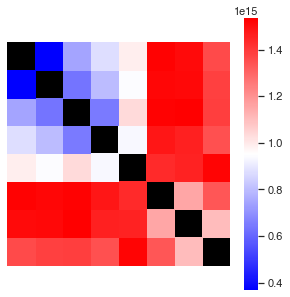

In [402]:
# styling
ax = sns.heatmap(vary_gen_linked_1000_m, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

In [403]:
# 1000
vary_gen_linked_10000_mats = []

for loc, item in vary_gen_linked_10000.df.groupby("locus"):
    nwk0 = item.loc[item.tidx == 0, "genealogy"].item()
    nwk1 = item.iloc[-1, -1]
    t0 = toytree.tree(nwk0)
    t1 = toytree.tree(nwk1)
    d0 = toytree.distance.get_tip_distance_matrix(t0)
    d1 = toytree.distance.get_tip_distance_matrix(t1)
    diff = abs(d0 - d1)
    vary_gen_linked_10000_mats.append(diff)

vary_gen_linked_10000_m = np.array(vary_gen_linked_10000_mats).var(axis=0) 
pd.DataFrame(vary_gen_linked_10000_m)

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.804309e+15,1.974963e+15,2.085123e+15,2.081118e+15,2.159970e+15,2.121853e+15,2.105265e+15
1,1.804309e+15,0.000000e+00,1.240532e+15,1.492472e+15,1.656775e+15,1.944418e+15,1.839150e+15,1.803752e+15
2,1.974963e+15,1.240532e+15,0.000000e+00,1.763453e+15,1.929765e+15,2.194713e+15,2.132467e+15,2.083405e+15
3,2.085123e+15,1.492472e+15,1.763453e+15,0.000000e+00,9.683998e+14,1.417624e+15,1.355574e+15,1.304412e+15
4,2.081118e+15,1.656775e+15,1.929765e+15,9.683998e+14,0.000000e+00,9.905903e+14,1.079118e+15,1.082524e+15
5,2.159970e+15,1.944418e+15,2.194713e+15,1.417624e+15,9.905903e+14,0.000000e+00,3.837243e+14,4.304299e+14
6,2.121853e+15,1.839150e+15,2.132467e+15,1.355574e+15,1.079118e+15,3.837243e+14,0.000000e+00,2.284884e+14
7,2.105265e+15,1.803752e+15,2.083405e+15,1.304412e+15,1.082524e+15,4.304299e+14,2.284884e+14,0.000000e+00


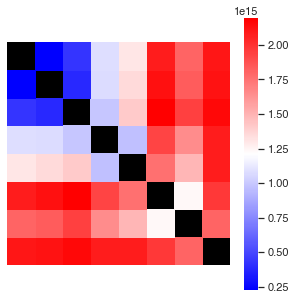

In [404]:
# styling
ax = sns.heatmap(vary_gen_linked_10000_m, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## Vary Ne and gen

### Simulate

In [154]:
# variable Ne and gen
vary_Ne_gen_linked_1000 = ipcoal.Model(tree=tre3)
vary_Ne_gen_linked_1000.sim_trees(nloci=100, nsites=1000) 

In [155]:
vary_Ne_gen_linked_10000 = ipcoal.Model(tree=tre3)
vary_Ne_gen_linked_10000.sim_trees(nloci=100, nsites=10000) 

In [156]:
vary_Ne_gen_linked_10000.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,5,5,0,0,(r3:21912754.41296290978...
1,0,5,15,10,0,1,(r3:21912754.41296290978...
2,0,15,21,6,0,2,(r3:19727901.53307613357...
3,0,21,45,24,0,3,((r1:14175218.8970019053...
4,0,45,67,22,0,4,((r1:14175218.8970019053...
...,...,...,...,...,...,...,...
84754,99,9888,9894,6,0,861,((r7:4851736.06623876094...
84755,99,9894,9964,70,0,862,((r7:4851736.06623876094...
84756,99,9964,9973,9,0,863,((r7:4851736.06623876094...
84757,99,9973,9974,1,0,864,((r7:6997105.21177443489...


In [157]:
vary_Ne_gen_linked_1000.df.to_csv('./vary_Ne_gen_linked_1000_df_100loci.csv')
vary_Ne_gen_linked_10000.df.to_csv('./vary_Ne_gen_linked_10000_df_100loci.csv')

### Difference of Node distance Var

In [405]:
# 1000
vary_Ne_gen_linked_1000_mats = []

for loc, item in vary_Ne_gen_linked_1000.df.groupby("locus"):
    nwk0 = item.loc[item.tidx == 0, "genealogy"].item()
    nwk1 = item.iloc[-1, -1]
    t0 = toytree.tree(nwk0)
    t1 = toytree.tree(nwk1)
    d0 = toytree.distance.get_tip_distance_matrix(t0)
    d1 = toytree.distance.get_tip_distance_matrix(t1)
    diff = abs(d0 - d1)
    vary_Ne_gen_linked_1000_mats.append(diff)

vary_Ne_gen_linked_1000_m = np.array(vary_Ne_gen_linked_1000_mats).var(axis=0) 
pd.DataFrame(vary_Ne_gen_linked_1000_m)

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.489369e+15,1.728526e+15,2.345367e+15,2.232139e+15,2.237497e+15,2.073270e+15,2.100153e+15
1,1.489369e+15,0.000000e+00,1.161388e+15,1.880375e+15,1.954495e+15,2.023530e+15,1.937279e+15,1.861618e+15
2,1.728526e+15,1.161388e+15,0.000000e+00,1.641882e+15,2.303120e+15,2.333088e+15,2.270824e+15,2.161175e+15
3,2.345367e+15,1.880375e+15,1.641882e+15,0.000000e+00,1.578256e+15,1.848990e+15,1.546256e+15,1.449378e+15
4,2.232139e+15,1.954495e+15,2.303120e+15,1.578256e+15,0.000000e+00,7.400760e+14,7.252771e+14,6.720065e+14
5,2.237497e+15,2.023530e+15,2.333088e+15,1.848990e+15,7.400760e+14,0.000000e+00,4.808610e+14,4.444150e+14
6,2.073270e+15,1.937279e+15,2.270824e+15,1.546256e+15,7.252771e+14,4.808610e+14,0.000000e+00,1.658781e+14
7,2.100153e+15,1.861618e+15,2.161175e+15,1.449378e+15,6.720065e+14,4.444150e+14,1.658781e+14,0.000000e+00


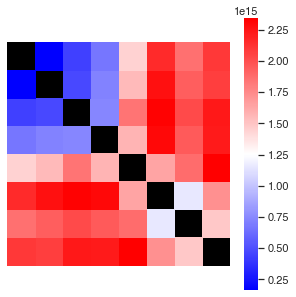

In [418]:
# styling
ax = sns.heatmap(vary_Ne_gen_linked_1000_m, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

In [407]:
# 1000
vary_Ne_gen_linked_10000_mats = []

for loc, item in vary_Ne_gen_linked_10000.df.groupby("locus"):
    nwk0 = item.loc[item.tidx == 0, "genealogy"].item()
    nwk1 = item.iloc[-1, -1]
    t0 = toytree.tree(nwk0)
    t1 = toytree.tree(nwk1)
    d0 = toytree.distance.get_tip_distance_matrix(t0)
    d1 = toytree.distance.get_tip_distance_matrix(t1)
    diff = abs(d0 - d1)
    vary_Ne_gen_linked_10000_mats.append(diff)

vary_Ne_gen_linked_10000_m = np.array(vary_Ne_gen_linked_10000_mats).var(axis=0) 
pd.DataFrame(vary_Ne_gen_linked_10000_m)

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.109473e+15,1.554507e+15,1.523041e+15,1.688069e+15,1.782717e+15,1.588951e+15,1.665003e+15
1,1.109473e+15,0.000000e+00,1.491280e+15,1.602586e+15,1.786641e+15,1.755592e+15,1.538188e+15,1.624138e+15
2,1.554507e+15,1.491280e+15,0.000000e+00,1.141186e+15,1.740891e+15,1.512869e+15,1.309841e+15,1.327348e+15
3,1.523041e+15,1.602586e+15,1.141186e+15,0.000000e+00,1.504354e+15,1.237302e+15,1.142375e+15,1.151955e+15
4,1.688069e+15,1.786641e+15,1.740891e+15,1.504354e+15,0.000000e+00,3.941575e+14,4.605770e+14,5.232499e+14
5,1.782717e+15,1.755592e+15,1.512869e+15,1.237302e+15,3.941575e+14,0.000000e+00,3.698304e+14,4.439162e+14
6,1.588951e+15,1.538188e+15,1.309841e+15,1.142375e+15,4.605770e+14,3.698304e+14,0.000000e+00,2.390649e+14
7,1.665003e+15,1.624138e+15,1.327348e+15,1.151955e+15,5.232499e+14,4.439162e+14,2.390649e+14,0.000000e+00


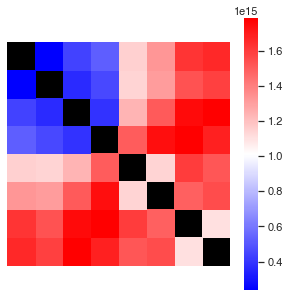

In [408]:
# styling
ax = sns.heatmap(vary_Ne_gen_linked_10000_m, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]), xticklabels=False, yticklabels=False)
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## (E) Node distance Difference

### Vary Ne

In [409]:
vary_Ne_unlinked_linked_var_diff = abs(vary_Ne_linked_1000_m - vary_Ne_var)
vary_Ne_unlinked_linked_var_diff

,0,1,2,3,4,5,6,7
0,0.000000e+00,2.100770e+15,1.716963e+15,1.626346e+15,1.507430e+15,1.344304e+15,1.271402e+15,1.317972e+15
1,2.100770e+15,0.000000e+00,1.029075e+15,1.525210e+15,1.468482e+15,1.299378e+15,1.134149e+15,1.108010e+15
2,1.716963e+15,1.029075e+15,0.000000e+00,1.467385e+15,1.578517e+15,1.406243e+15,1.300071e+15,1.288759e+15
3,1.626346e+15,1.525210e+15,1.467385e+15,0.000000e+00,9.720345e+14,1.083821e+15,1.091535e+15,1.160791e+15
4,1.507430e+15,1.468482e+15,1.578517e+15,9.720345e+14,0.000000e+00,8.808426e+14,8.955314e+14,9.634425e+14
5,1.344304e+15,1.299378e+15,1.406243e+15,1.083821e+15,8.808426e+14,0.000000e+00,5.937754e+14,6.951434e+14
6,1.271402e+15,1.134149e+15,1.300071e+15,1.091535e+15,8.955314e+14,5.937754e+14,0.000000e+00,3.197506e+14
7,1.317972e+15,1.108010e+15,1.288759e+15,1.160791e+15,9.634425e+14,6.951434e+14,3.197506e+14,0.000000e+00


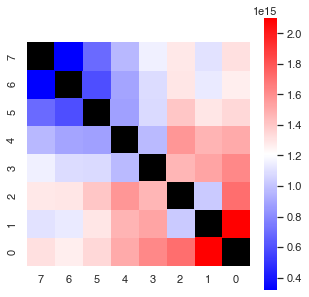

In [411]:
ax = sns.heatmap(vary_Ne_unlinked_linked_var_diff, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]))
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

### Vary gen

In [412]:
vary_gen_unlinked_linked_var_diff = abs(vary_gen_linked_1000_m - vary_gen_var)
vary_gen_unlinked_linked_var_diff

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.102663e+15,1.339100e+15,1.522060e+15,1.349571e+15,1.392608e+15,1.389472e+15,1.363078e+15
1,1.102663e+15,0.000000e+00,1.154249e+15,1.457796e+15,1.462097e+15,1.535338e+15,1.516654e+15,1.509163e+15
2,1.339100e+15,1.154249e+15,0.000000e+00,1.435408e+15,1.482301e+15,1.528764e+15,1.519266e+15,1.530268e+15
3,1.522060e+15,1.457796e+15,1.435408e+15,0.000000e+00,9.352709e+14,1.036551e+15,9.435619e+14,9.927228e+14
4,1.349571e+15,1.462097e+15,1.482301e+15,9.352709e+14,0.000000e+00,6.498376e+14,7.974701e+14,8.770502e+14
5,1.392608e+15,1.535338e+15,1.528764e+15,1.036551e+15,6.498376e+14,0.000000e+00,6.356747e+14,7.454723e+14
6,1.389472e+15,1.516654e+15,1.519266e+15,9.435619e+14,7.974701e+14,6.356747e+14,0.000000e+00,3.691372e+14
7,1.363078e+15,1.509163e+15,1.530268e+15,9.927228e+14,8.770502e+14,7.454723e+14,3.691372e+14,0.000000e+00


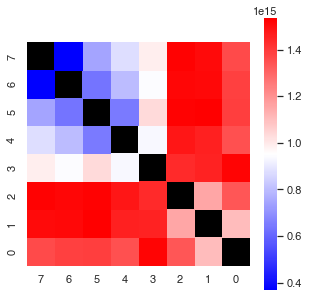

In [413]:
ax = sns.heatmap(vary_gen_unlinked_linked_var_diff, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]))
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

### Vary Ne & gen

In [414]:
vary_Ne_gen_unlinked_linked_var_diff = abs(vary_Ne_gen_linked_1000_m - vary_Ne_gen_var)
vary_Ne_gen_unlinked_linked_var_diff

,0,1,2,3,4,5,6,7
0,0.000000e+00,1.489369e+15,1.728526e+15,2.345367e+15,2.232139e+15,2.237497e+15,2.073270e+15,2.100153e+15
1,1.489369e+15,0.000000e+00,1.161388e+15,1.880375e+15,1.954495e+15,2.023530e+15,1.937279e+15,1.861618e+15
2,1.728526e+15,1.161388e+15,0.000000e+00,1.641882e+15,2.303120e+15,2.333088e+15,2.270824e+15,2.161175e+15
3,2.345367e+15,1.880375e+15,1.641882e+15,0.000000e+00,1.578256e+15,1.848990e+15,1.546256e+15,1.449378e+15
4,2.232139e+15,1.954495e+15,2.303120e+15,1.578256e+15,0.000000e+00,7.400760e+14,7.252771e+14,6.720065e+14
5,2.237497e+15,2.023530e+15,2.333088e+15,1.848990e+15,7.400760e+14,0.000000e+00,4.808610e+14,4.444150e+14
6,2.073270e+15,1.937279e+15,2.270824e+15,1.546256e+15,7.252771e+14,4.808610e+14,0.000000e+00,1.658781e+14
7,2.100153e+15,1.861618e+15,2.161175e+15,1.449378e+15,6.720065e+14,4.444150e+14,1.658781e+14,0.000000e+00


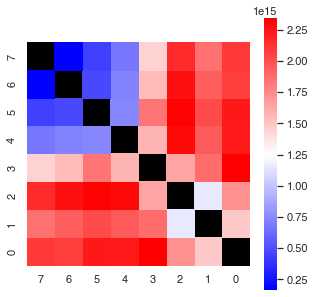

In [443]:
ax = sns.heatmap(vary_Ne_gen_unlinked_linked_var_diff, cmap="bwr", square=True, mask=np.diag([1, 1, 1, 1, 1, 1, 1, 1]))
ax.set_facecolor('black')
plt.xlim(8,0)
plt.ylim(0,8)
plt.show()

## 3. Tree distance

### Unlinked

### Vary Ne

In [253]:
vary_Ne.df

,locus,start,end,nbps,nsnps,tidx,genealogy
0,0,0,1,1,0,0,((r2:7562115.62818311154...
1,1,0,1,1,0,0,(r4:34693653.02054862678...
2,2,0,1,1,0,0,((r0:10175995.5391452088...
3,3,0,1,1,0,0,((r2:7986028.02703840285...
4,4,0,1,1,0,0,((r5:14888888.1210579276...
...,...,...,...,...,...,...,...
995,995,0,1,1,0,0,((r1:4810645.66102395765...
996,996,0,1,1,0,0,(r1:27464905.46355142816...
997,997,0,1,1,0,0,(r5:14685703.00036794692...
998,998,0,1,1,0,0,((r6:4441031.12254169490...


In [427]:
vary_Ne_tree_dist_df_out = pd.DataFrame(columns= ["vary_Ne_trees", "RF", "RFI", "RFG MCI", "RFG SPI", "QRT"])

for i in range(0, vary_Ne.df.shape[0]-1):
    tree1 = toytree.tree(vary_Ne.df["genealogy"][i])
    tree2 = toytree.tree(vary_Ne.df["genealogy"][i+1])
    rf = toytree.distance.get_treedist_rf(tree1, tree2, normalize=True)
    rfi = toytree.distance.get_treedist_rfi(tree1, tree2, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(tree1, tree2, normalize=True)
    rfg_spi = toytree.distance.get_treedist_rfg_spi(tree1, tree2, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(tree1, tree2, normalize=True)
    
    vary_Ne_tree_dist_df_out.loc[len(vary_Ne_tree_dist_df_out.index)] = [str(str(i) + "," + str(i+1)), rf, rfi, rfg_mci, rfg_spi, 1-qrt] 

vary_Ne_tree_dist_df_out.to_csv('./vary_Ne_tree_dist.csv')
vary_Ne_tree_dist_df_out

,vary_Ne_trees,RF,RFI,RFG MCI,RFG SPI,QRT
0,"0,1",1.0,1.000000,0.815504,0.886954,0.800000
1,"1,2",1.0,1.000000,0.868209,0.917116,0.814286
2,"2,3",1.0,1.000000,0.775203,0.848339,0.742857
3,"3,4",1.0,1.000000,0.807965,0.869650,0.771429
4,"4,5",1.0,1.000000,0.634691,0.685572,0.542857
...,...,...,...,...,...,...
994,"994,995",1.0,1.000000,0.848663,0.907990,0.771429
995,"995,996",0.8,0.832957,0.659635,0.715058,0.642857
996,"996,997",1.0,1.000000,0.698935,0.762514,0.628571
997,"997,998",1.0,1.000000,0.776149,0.831499,0.714286


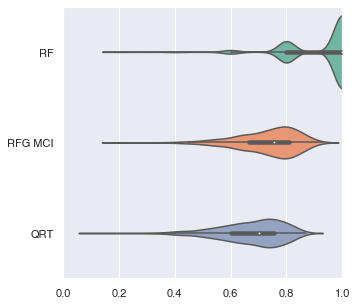

In [428]:
ax1 = sns.violinplot(data=vary_Ne_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax1.set_xlim(0, 1);

### Vary gen

In [424]:
vary_gen_tree_dist_df_out = pd.DataFrame(columns= ["vary_gen_trees", "RF", "RFG MCI", "QRT"])

for i in range(0, vary_gen.df.shape[0]-1):
    tree1 = toytree.tree(vary_gen.df["genealogy"][i])
    tree2 = toytree.tree(vary_gen.df["genealogy"][i+1])
    rf = toytree.distance.get_treedist_rf(tree1, tree2, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(tree1, tree2, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(tree1, tree2, normalize=True)
    
    vary_gen_tree_dist_df_out.loc[len(vary_gen_tree_dist_df_out.index)] = [str(str(i) + "," + str(i+1)), rf, rfg_mci, 1-qrt] 

vary_gen_tree_dist_df_out.to_csv('./vary_gen_tree_dist.csv')
vary_gen_tree_dist_df_out

,vary_gen_trees,RF,RFG MCI,QRT
0,"0,1",0.8,0.593789,0.571429
1,"1,2",1.0,0.826935,0.771429
2,"2,3",1.0,0.849068,0.757143
3,"3,4",0.8,0.538180,0.442857
4,"4,5",1.0,0.803722,0.700000
...,...,...,...,...
994,"994,995",1.0,0.662593,0.600000
995,"995,996",0.8,0.690071,0.671429
996,"996,997",1.0,0.775203,0.757143
997,"997,998",1.0,0.775203,0.785714


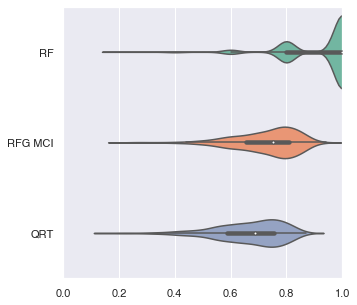

In [425]:
ax2 = sns.violinplot(data=vary_gen_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax2.set_xlim(0, 1);

### Vary Ne & gen

In [422]:
vary_Ne_gen_tree_dist_df_out = pd.DataFrame(columns= ["vary_Ne_gen_trees", "RF", "RFG MCI", "QRT"])

for i in range(0, vary_Ne_gen.df.shape[0]-1):
    tree1 = toytree.tree(vary_Ne_gen.df["genealogy"][i])
    tree2 = toytree.tree(vary_Ne_gen.df["genealogy"][i+1])
    rf = toytree.distance.get_treedist_rf(tree1, tree2, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(tree1, tree2, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(tree1, tree2, normalize=True)
    
    vary_Ne_gen_tree_dist_df_out.loc[len(vary_Ne_gen_tree_dist_df_out.index)] = [str(str(i) + "," + str(i+1)), rf, rfg_mci, 1-qrt] 

vary_Ne_gen_tree_dist_df_out.to_csv('./vary_Ne_gen_tree_dist.csv')
vary_Ne_gen_tree_dist_df_out

,vary_Ne_gen_trees,RF,RFG MCI,QRT
0,"0,1",0.8,0.587516,0.571429
1,"1,2",1.0,0.776149,0.685714
2,"2,3",1.0,0.867467,0.842857
3,"3,4",1.0,0.762942,0.728571
4,"4,5",1.0,0.746096,0.714286
...,...,...,...,...
994,"994,995",0.8,0.629140,0.585714
995,"995,996",1.0,0.836156,0.814286
996,"996,997",1.0,0.755256,0.714286
997,"997,998",1.0,0.734271,0.671429


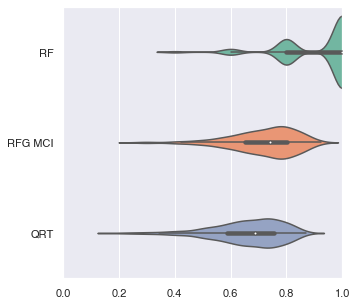

In [423]:
ax3 = sns.violinplot(data=vary_Ne_gen_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax3.set_xlim(0, 1);

### Linked

### Vary Ne 1000bp

In [420]:
vary_Ne_linked_1000_tree_dist_df_out = pd.DataFrame(columns= ["RF", "RFG MCI", "QRT"])

for key, val in vary_Ne_linked_1000.df.groupby("locus"):
    n0 = val.iloc[0, -1]
    n1 = val.iloc[-1, -1]
    t0 = toytree.tree(n0)
    t1 = toytree.tree(n1)
    rf = toytree.distance.get_treedist_rf(t0, t1, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(t0, t1, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(t0, t1, normalize=True)
    
    vary_Ne_linked_1000_tree_dist_df_out.loc[len(vary_Ne_linked_1000_tree_dist_df_out.index)] = [rf, rfg_mci, 1-qrt] 

vary_Ne_linked_1000_tree_dist_df_out

,RF,RFG MCI,QRT
0,1.0,0.738956,0.628571
1,0.8,0.640864,0.514286
2,1.0,0.849068,0.785714
3,1.0,0.834156,0.785714
4,0.8,0.546812,0.471429
...,...,...,...
95,1.0,0.865692,0.828571
96,1.0,0.750192,0.714286
97,0.8,0.618264,0.485714
98,1.0,0.761616,0.685714


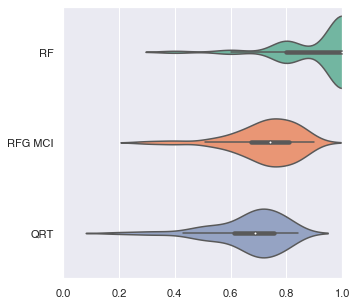

In [429]:
ax4 = sns.violinplot(data=vary_Ne_linked_1000_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax4.set_xlim(0, 1);

### Vary Ne 10000bp

In [430]:
vary_Ne_linked_10000_tree_dist_df_out = pd.DataFrame(columns= ["RF", "RFG MCI", "QRT"])

for key, val in vary_Ne_linked_10000.df.groupby("locus"):
    n0 = val.iloc[0, -1]
    n1 = val.iloc[-1, -1]
    t0 = toytree.tree(n0)
    t1 = toytree.tree(n1)
    rf = toytree.distance.get_treedist_rf(t0, t1, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(t0, t1, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(t0, t1, normalize=True)
    
    vary_Ne_linked_10000_tree_dist_df_out.loc[len(vary_Ne_linked_10000_tree_dist_df_out.index)] = [rf, rfg_mci, 1-qrt] 

vary_Ne_linked_10000_tree_dist_df_out

,RF,RFG MCI,QRT
0,0.4,0.283152,0.185714
1,0.8,0.539381,0.471429
2,1.0,0.780037,0.700000
3,0.8,0.549819,0.471429
4,1.0,0.800504,0.757143
...,...,...,...
95,1.0,0.790066,0.728571
96,1.0,0.836156,0.800000
97,1.0,0.711183,0.700000
98,1.0,0.849068,0.757143


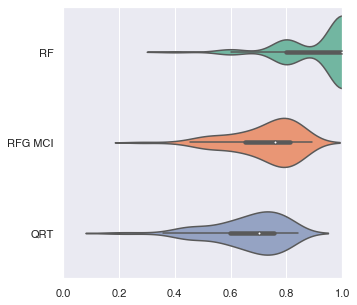

In [431]:
ax5 = sns.violinplot(data=vary_Ne_linked_10000_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax5.set_xlim(0, 1);

### Vary gen 1000bp

In [432]:
vary_gen_linked_1000_tree_dist_df_out = pd.DataFrame(columns= ["RF", "RFG MCI", "QRT"])

for key, val in vary_gen_linked_1000.df.groupby("locus"):
    n0 = val.iloc[0, -1]
    n1 = val.iloc[-1, -1]
    t0 = toytree.tree(n0)
    t1 = toytree.tree(n1)
    rf = toytree.distance.get_treedist_rf(t0, t1, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(t0, t1, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(t0, t1, normalize=True)
    
    vary_gen_linked_1000_tree_dist_df_out.loc[len(vary_gen_linked_1000_tree_dist_df_out.index)] = [rf, rfg_mci, 1-qrt] 

vary_gen_linked_1000_tree_dist_df_out

,RF,RFG MCI,QRT
0,1.0,0.835004,0.757143
1,1.0,0.688335,0.600000
2,1.0,0.752192,0.657143
3,1.0,0.778889,0.742857
4,1.0,0.780037,0.728571
...,...,...,...
95,1.0,0.711183,0.700000
96,1.0,0.706050,0.642857
97,1.0,0.801540,0.800000
98,1.0,0.778948,0.742857


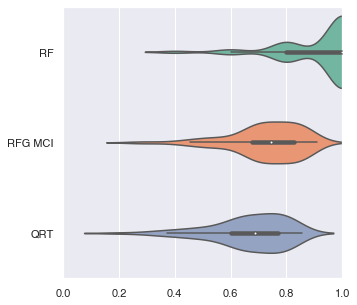

In [433]:
ax6 = sns.violinplot(data=vary_gen_linked_1000_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax6.set_xlim(0, 1);

### Vary gen 10000bp

In [434]:
vary_gen_linked_10000_tree_dist_df_out = pd.DataFrame(columns= ["RF", "RFG MCI", "QRT"])

for key, val in vary_gen_linked_10000.df.groupby("locus"):
    n0 = val.iloc[0, -1]
    n1 = val.iloc[-1, -1]
    t0 = toytree.tree(n0)
    t1 = toytree.tree(n1)
    rf = toytree.distance.get_treedist_rf(t0, t1, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(t0, t1, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(t0, t1, normalize=True)
    
    vary_gen_linked_10000_tree_dist_df_out.loc[len(vary_gen_linked_10000_tree_dist_df_out.index)] = [rf, rfg_mci, 1-qrt] 

vary_gen_linked_10000_tree_dist_df_out

,RF,RFG MCI,QRT
0,1.0,0.754414,0.657143
1,1.0,0.814541,0.757143
2,1.0,0.783567,0.742857
3,0.8,0.637246,0.585714
4,1.0,0.757273,0.714286
...,...,...,...
95,1.0,0.762942,0.657143
96,1.0,0.683579,0.614286
97,0.6,0.423128,0.357143
98,1.0,0.762942,0.728571


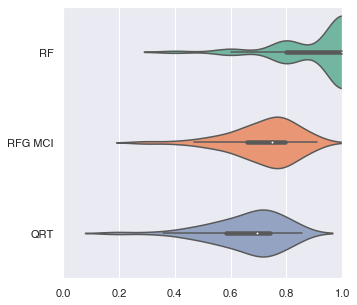

In [436]:
ax7 = sns.violinplot(data=vary_gen_linked_10000_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2", xmin=0, xmax=1);
ax7.set_xlim(0, 1);

### Vary Ne & gen 1000bp

In [437]:
vary_Ne_gen_linked_1000_tree_dist_df_out = pd.DataFrame(columns= ["RF", "RFG MCI", "QRT"])

for key, val in vary_Ne_gen_linked_1000.df.groupby("locus"):
    n0 = val.iloc[0, -1]
    n1 = val.iloc[-1, -1]
    t0 = toytree.tree(n0)
    t1 = toytree.tree(n1)
    rf = toytree.distance.get_treedist_rf(t0, t1, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(t0, t1, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(t0, t1, normalize=True)
    
    vary_Ne_gen_linked_1000_tree_dist_df_out.loc[len(vary_Ne_gen_linked_1000_tree_dist_df_out.index)] = [rf, rfg_mci, 1-qrt] 

vary_Ne_gen_linked_1000_tree_dist_df_out

,RF,RFG MCI,QRT
0,1.0,0.671455,0.557143
1,1.0,0.764852,0.728571
2,1.0,0.710472,0.585714
3,1.0,0.867467,0.842857
4,0.8,0.594972,0.528571
...,...,...,...
95,0.8,0.630049,0.542857
96,0.8,0.587516,0.571429
97,1.0,0.803263,0.728571
98,0.6,0.435196,0.414286


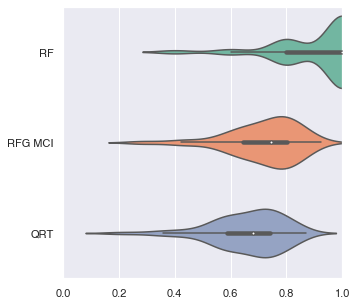

In [438]:
ax8 = sns.violinplot(data=vary_Ne_gen_linked_1000_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax8.set_xlim(0, 1);

### Vary Ne & gen 10000bp

In [439]:
vary_Ne_gen_linked_10000_tree_dist_df_out = pd.DataFrame(columns= ["RF", "RFG MCI", "QRT"])

for key, val in vary_Ne_gen_linked_10000.df.groupby("locus"):
    n0 = val.iloc[0, -1]
    n1 = val.iloc[-1, -1]
    t0 = toytree.tree(n0)
    t1 = toytree.tree(n1)
    rf = toytree.distance.get_treedist_rf(t0, t1, normalize=True)
    rfg_mci = toytree.distance.get_treedist_rfg_mci(t0, t1, normalize=True)
    qrt = toytree.distance.get_treedist_qrt(t0, t1, normalize=True)
    
    vary_Ne_gen_linked_10000_tree_dist_df_out.loc[len(vary_Ne_gen_linked_10000_tree_dist_df_out.index)] = [rf, rfg_mci, 1-qrt] 

vary_Ne_gen_linked_10000_tree_dist_df_out

,RF,RFG MCI,QRT
0,1.0,0.803263,0.728571
1,1.0,0.850971,0.800000
2,0.8,0.570892,0.442857
3,1.0,0.535425,0.500000
4,1.0,0.700006,0.657143
...,...,...,...
95,0.8,0.605241,0.571429
96,1.0,0.862090,0.814286
97,0.8,0.503461,0.371429
98,1.0,0.720222,0.685714


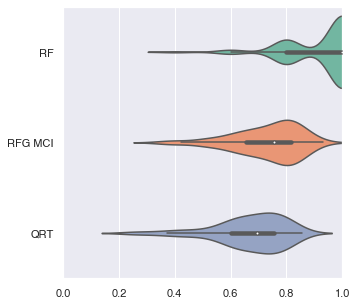

In [440]:
ax9 = sns.violinplot(data=vary_Ne_gen_linked_10000_tree_dist_df_out[["RF", "RFG MCI", "QRT"]], orient="h", palette="Set2");
ax9.set_xlim(0, 1);